In [2]:
import pandas as pd
WEIGHT_AND_HEIGHT = "https://raw.githubusercontent.com/panicpotatoe/dataset/master/SOCR_Data_Dinov_020108_HeightsWeights.csv"
df = pd.read_csv(WEIGHT_AND_HEIGHT)
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


<Axes: xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

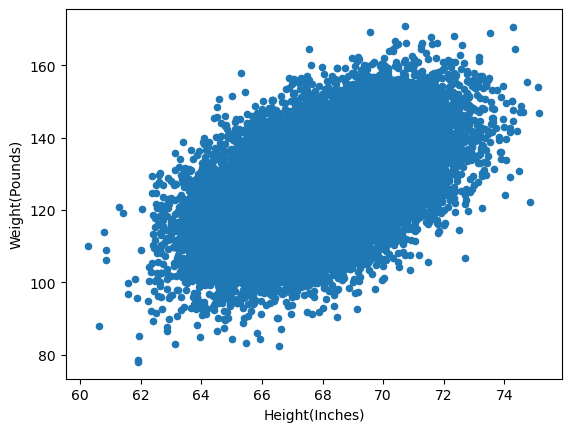

In [3]:
# scatter plot of height and weight
df.plot.scatter(x="Height(Inches)", y="Weight(Pounds)")

<Axes: xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

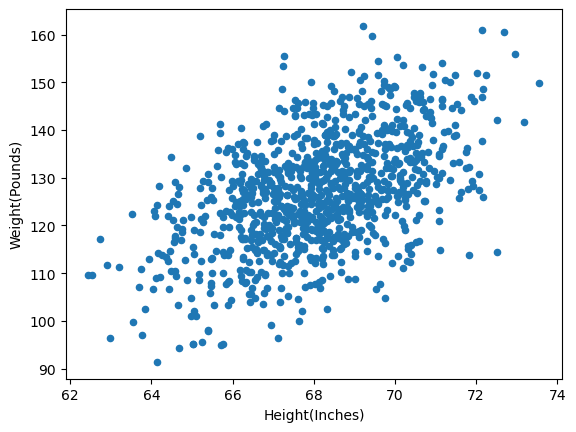

In [4]:
# get sample of 1000
df_sample = df.sample(1000)
df_sample.plot.scatter(x="Height(Inches)", y="Weight(Pounds)")

$$r=\frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum(x_i-\bar{x})^2\sum(y_i-\bar{y})^2}}$$

In [5]:
# create a correlation function with pure Python
def mean(values):
    return sum(values) / float(len(values))

def correlation_1(arr1, arr2):
    mean1, mean2 = mean(arr1), mean(arr2)
    numerator, denominator1, denominator2 = 0, 0, 0
    for i in range(len(arr1)):
        numerator += (arr1[i] - mean1) * (arr2[i] - mean2)
        denominator1 += (arr1[i] - mean1) ** 2
        denominator2 += (arr2[i] - mean2) ** 2
    denominator = (denominator1 * denominator2) ** 0.5
    if denominator != 0:
        correlation = numerator / denominator
        return correlation
    else:
        return 0


In [6]:
# create a correlation function that receives two array and returns the correlation coefficient
def correlation_2(arr1, arr2):
    df = pd.DataFrame({"arr1": arr1, "arr2": arr2})
    return df.corr().iloc[0, 1]


In [12]:
# a function to calculate correlation of 2 arrays
def correlation_3(x, y):
    import numpy as np
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_std = np.std(x)
    y_std = np.std(y)
    return ((x - x_mean) * (y - y_mean)).mean() / (x_std * y_std)

In [8]:
# a function to calculate correlation of 2 arrays using sum and mean only
def correlation_4(x, y):
    import numpy as np
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    return ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean) ** 2).sum()


In [13]:
arr1 = [1, 2, 3, 4, 5]
arr2 = [2, 4, 6, 8, 10]

print(correlation_1(arr1, arr2))
print(correlation_2(arr1, arr2))
print(correlation_3(arr1, arr2))
print(correlation_4(arr1, arr2))


1.0
1.0
0.9999999999999998


AttributeError: 'list' object has no attribute 'mean'